# Analyzing The Titanic Data Set.

One of the most important aspects of the Titanic, apart from being one of the largest passenger ships during its time, was its untimely sinking and the lives lost due to it. With only 20 lifeboats for over 1000s of passengers, it's worth examining what may have affected the chances of survival for the onboard passengers. In the following report we will try to analyze every aspect the titanic-data.csv file has to offer. 

Let's begin with understanding the passengers in general, like:

- How many passengers were in the 1st, 2nd and 3rd class and how many of them survived overall?
- We'll further analyze, no. of passengers based on their gender.
- What were the age groups, and how many people survived in each age group?
- People traveling with family and its affect on their survival?
- How did the decks affect the chances?
- Where did most passengers embarked their journey from?

# General Inference

It's been close to 20 years since the 1998 'Titanic' movie was released. As entertaining as it is, it is also known for its accuracy with which the passengers & their emotions were truly depicted. So before we head to Netflix for refresher course, we will now try to get our hands on actual passengers data and learn a bit more about them and the ship.

### Passengers In General

- Most Passengers were in the 3rd class, followed by 2nd and 1st class. (For details, scroll down to Plot 1)
- 1st Class passengers overall had a better chance with over 62% chance of survival, followed by the 2nd class and 3rd class. (Plot 2)

### Gender & Survival

- Males were high in number with over 500 in total, while females were just over 300. (Plot 3)
- But when it came to survival, 70% of females were saved, while only 18% of males lived to tell the tale. (Plot 4)
- Most certainly, the 1st and 2nd Class female passengers were all saved with only a few casualties but the same cannot be said for the 3rd Class female passengers as only half of them could be saved. (Plot 5)
- Only 15% & 13% could be saved from the 2nd & 3rd class male population respectively.

### Accompanying Family

(The separate effects on survival by traveling with siblings/spouse or parents/children, can be found on Plot 6 & 7.)

- Passengers traveling with family members had a survival rate of 50% as compared to 30% for passengers who traveled alone. (Plot 8)

### Age Groups

- Most passengers were somewhere between the age 20 and 40, with the lowest survival rate as well. (Plot 9 & 10)
- More than 3/4th of the children population (ages 0 - 17) were saved from the 1st and 2nd class. The same was the case for the women (ages 19 and more). (Plot 11 & 12)
- The men (ages 19 and more), especially from the 2nd & 3rd class, had the worst of luck, since over 80% of them didn't survive. (Plot 11 & 12)

### Decks

(When it comes to the cabins or decks, the csv file has data only for 204 passengers out a total of 891. So any conclusion in this section should be studied as an instance rather than as a finding)

- Most of the passengers were on Deck C, followed by B and D. (Plot 13)
- Decks A, B, C & D were mainly composed of 1st Class passengers. (Plot 14)
- Given the surival rate, there might be a possibility the passengers on the upper decks, mainly Decks B, C & D, had an early access to the life boats. (Plot 14)

### Ports Embarked

- Most passengers started their journey from port S, followed by C and Q. (Plot 15)
- Ports C & S, were similar in terms of people boarding for all the passenger class. Whereas, Port Q saw an higher influx of 3rd class passengers, which might indicate it would haven in the vicinity of a poor neighborhood during that time.

### To conclude, the preferences were given as follows:
- Gender & Age - Women and children were definitely given the first priority to life boats.
- Class - 1st class passengers, followed by 2nd and 3rd.
- Accompanying family - It seemed the passengers traveling with family had a good survival rate, especially for the ones traveling with parents or children.
- Age Groups - Similar to the first conclusion, women and children had a good survival rate, followed by the men.
- Decks - (With the limited data available), passengers on Decks B, C & D had a better chance getting on a life boat.
- Port Embarked - Although, this ports might not have played a crucical role in the survival, but it does give an overall idea where most of the passengers came from and the economy of the place surrounding it.

# Correction (as suggested by the Udacity Instructor after the first project review): To add a conclusion that states the limitation of the dataset.

### Limitations with the dataset:
- In the introduction, it is mentioned that the data set contains information from 891 of the 2224 passengers. Although, the sample is good for the purpose of practicing, but for a thorough study we don't know how the sample was selected, i.e. whether or not was there any intentional or unintentional bias involved in the selection, and how well the data & results represents the actual population scenario.
- With the data provided, it is not clear if all the listed people were passengers or were some of them crews onboard. It would be interesting to learn what were the survival chances for the crew members.
- The data on accompanying siblings/spouses or parents/children was a good addition, but there was a little confusion about it, since it doesn't mention clearly whether the passenger along with all the accompanying family members survived, when the value for 'Survival' is 1 for that particular passenger.
- Getting more information on passenger's cabins would have been more helpful to strengthen the conclusion about how the decks played a crucial role in getting to the life boats.

### Resources Used: 
https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic

http://www.titanicfacts.net/titanic-passengers.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

https://seaborn.pydata.org/generated/seaborn.factorplot.html

## For a detailed analysis on the topic to support the above inferences, please scroll down to find all the DataFrames and Bar Plots generated to support this study, along with the comments at each step.

In [1]:
#All the required imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading & loading the file
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


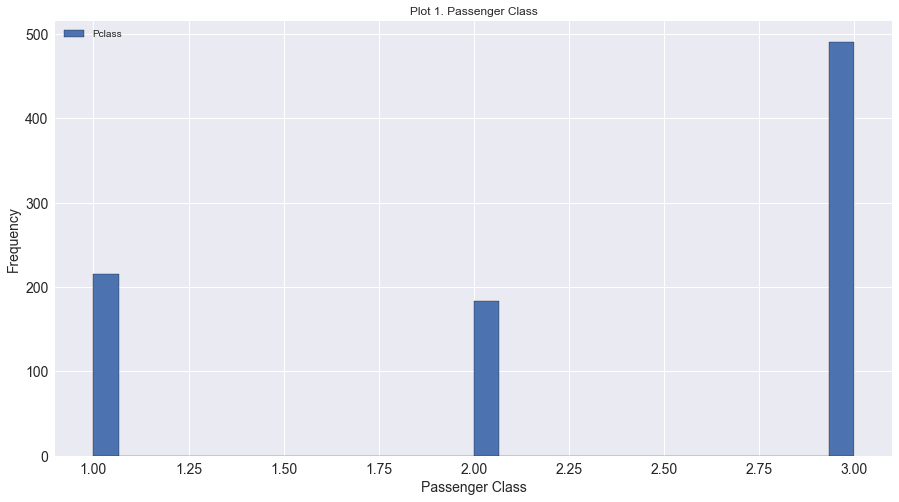

In [3]:
#Passenger distribution - Histogram
pclass_plot = titanic_df['Pclass'].plot(kind = 'hist', bins = 30, ec = 'black', figsize=(15, 8), legend = True, fontsize = 14, title = 'Plot 1. Passenger Class')
pclass_plot.set_xlabel('Passenger Class', fontsize = 14)
pclass_plot.set_ylabel('Frequency', fontsize = 14)
plt.show()

In [4]:
# The function 'passenger_count' returns a dataframe containing counts or values on areas:
#     Total
#     Survived
#     Didn't survive
#     Survival percentage
#     Didn't Survive Percentage

def passenger_count(column_1, value_1, column_2, value_2, index_name, column_name):
    df = titanic_df
    if column_2 == '' and value_2 == '':
        df_total = df[df[column_1] == value_1]
    else:
        df_total = df[(df[column_1] == value_1) & (df[column_2] == value_2)]
    df_survived = df_total[df_total['Survived'] == 1]
    df_no_survival = df_total[df_total['Survived'] == 0]
    total_count = df_total['PassengerId'].count()
    survived_count = df_survived['PassengerId'].count()
    no_survival_count = df_no_survival['PassengerId'].count()
    if total_count > 0:
        survived_percentage = float(survived_count * 100.0)/total_count
        no_survival_percentage = float(no_survival_count * 100.0)/total_count
    else:
        survived_percentage = 0
        no_survival_percentage = 0
    data = {'1. Total':[total_count],
            '2. Survived':[survived_count],
            '3. Didn\'t Survive':[no_survival_count],
            '4. % Survived':"{:.2f}".format(survived_percentage),
            '5. % Didn\'t Survive':"{:.2f}".format(no_survival_percentage)}
    df = pd.DataFrame(data, index = [index_name])
    df.columns.name = column_name
    return df

#The function 'build_plot' is to simply build a bar plot for the DataFrames

def build_plot(df, plot_title, xlabel):
    plot = df.plot(kind = 'bar', ec = 'black', figsize = (10, 8), legend = True, fontsize = 14, title = plot_title)
    plot.set_xlabel(xlabel, fontsize = 14)
    plot.set_ylabel('Count', fontsize = 14)
    return plot

In [5]:
#Survival based on passenger class - DataFrame
df_class_1 = passenger_count('Pclass', 1, '', '', '1', 'Passenger Class')
df_class_2 = passenger_count('Pclass', 2, '', '', '2', 'Passenger Class')
df_class_3 = passenger_count('Pclass', 3, '', '', '3', 'Passenger Class')

frame_1 = [df_class_1, df_class_2, df_class_3]
result_1 = pd.concat(frame_1)
result_1

Passenger Class,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
1,216,136,80,62.96,37.04
2,184,87,97,47.28,52.72
3,491,119,372,24.24,75.76


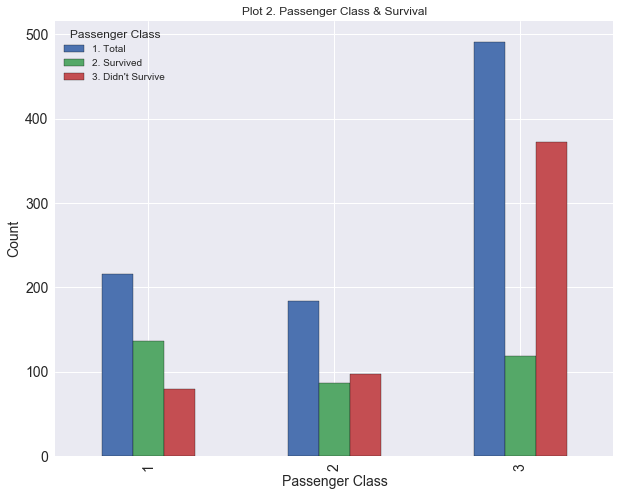

In [6]:
#Survival based on passenger class - Bar Plot
result_1_plot = build_plot(result_1, 'Plot 2. Passenger Class & Survival', 'Passenger Class')
plt.show()

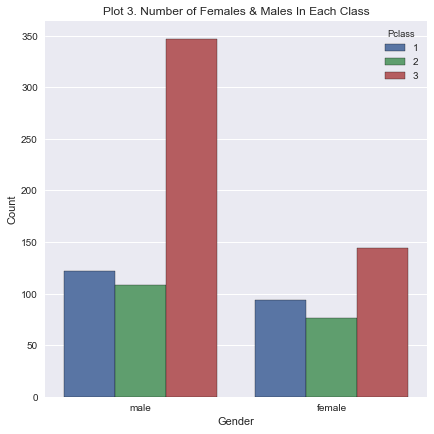

In [7]:
#Number of females & males in each passenger class - Bar Plot
gender_plot = sns.factorplot('Sex', data = titanic_df, hue = 'Pclass', kind = 'count', edgecolor = 'black', legend_out = False, size = 6)
gender_plot.set(xlabel = 'Gender', ylabel = 'Count', title = 'Plot 3. Number of Females & Males In Each Class')
plt.show()

In [8]:
#Survival based on gender - DataFrame
df_female = passenger_count('Sex', 'female', '', '', 'Female', 'Gender')
df_male = passenger_count('Sex', 'male', '', '', 'Male', 'Gender')

frame_2 = [df_female, df_male]
result_2 = pd.concat(frame_2)
result_2

Gender,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Female,314,233,81,74.20,25.80
Male,577,109,468,18.89,81.11


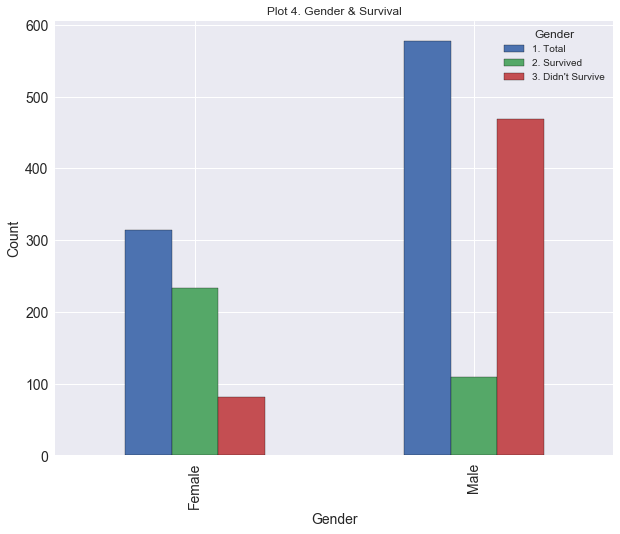

In [9]:
#Survival based on gender - Bar Plot
result_2_plot = build_plot(result_2, 'Plot 4. Gender & Survival', 'Gender')
plt.show()

In [10]:
#Survival rate based on gender and passenger class - DataFrame
df_female_first = passenger_count('Pclass', 1, 'Sex', 'female', '1st Class Female', 'Passenger Class & Gender')
df_male_first = passenger_count('Pclass', 1, 'Sex', 'male', '1st Class Male', 'Passenger Class & Gender')
df_female_second = passenger_count('Pclass', 2, 'Sex', 'female', '2nd Class Female', 'Passenger Class & Gender')
df_male_second = passenger_count('Pclass', 2, 'Sex', 'male', '2nd Class Male', 'Passenger Class & Gender')
df_female_third = passenger_count('Pclass', 3, 'Sex', 'female', '3rd Class Female', 'Passenger Class & Gender')
df_male_third = passenger_count('Pclass', 3, 'Sex', 'male', '3rd Class Male', 'Passenger Class & Gender')

frame_3 = [df_female_first, df_male_first, df_female_second, df_male_second, df_female_third, df_male_third]
result_3 = pd.concat(frame_3)
result_3

Passenger Class & Gender,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
1st Class Female,94,91,3,96.81,3.19
1st Class Male,122,45,77,36.89,63.11
2nd Class Female,76,70,6,92.11,7.89
2nd Class Male,108,17,91,15.74,84.26
3rd Class Female,144,72,72,50.00,50.00
3rd Class Male,347,47,300,13.54,86.46


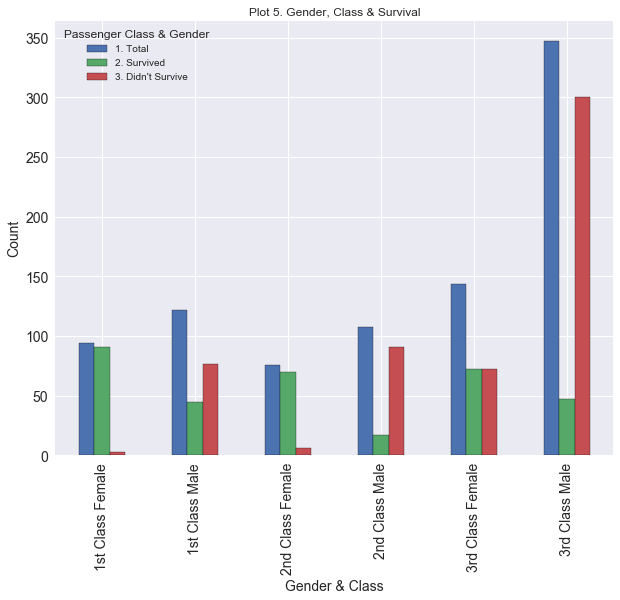

In [11]:
#Survival rate based on gender and passenger class - Bar Plot
result_3_plot = build_plot(result_3, 'Plot 5. Gender, Class & Survival', 'Gender & Class')
plt.show()

In [12]:
#The following function is completely similar to the previous 'passenger_count' function, except for the following considerations:
#     Accompanying siblings or spouses
#     Accompanying parents or childrens

def passenger_sib_par(column, value, index_name, column_name):
    df = titanic_df
    if value == 1:
        df_total = df[df[column] > 0]
    else:
        df_total = df[df[column] == 0]
    df_survived = df_total[df_total['Survived'] == 1]
    df_no_survival = df_total[df_total['Survived'] == 0]
    df_total_count = df_total['PassengerId'].count()
    df_survived_count = df_survived['PassengerId'].count()
    df_no_survival_count = df_no_survival['PassengerId'].count()
    if df_total_count > 0:
        survived_percentage = float(df_survived_count * 100.0)/df_total_count
        no_survival_percentage = float(df_no_survival_count * 100.0)/df_total_count
    else:
        survived_percentage = 0
        no_survial_percentage = 0
    data = {'1. Total':[df_total_count],
            '2. Survived':[df_survived_count],
            '3. Didn\'t Survive':[df_no_survival_count],
            '4. % Survived (Percent)':"{:.2f}".format(survived_percentage),
            '5. % Didn\'t Survive (Percent)':"{:.2f}".format(no_survival_percentage)}
    df = pd.DataFrame(data, index = [index_name])
    df.columns.name = column_name
    return df

In [13]:
#Survival rate based on accompanying siblings/spouses - DataFrame
df_sibsp = passenger_sib_par('SibSp', 1, 'Yes', 'With Siblings/Spouses')
df_no_sibsp = passenger_sib_par('SibSp', 0, 'No', 'With Siblings/Spouses')

frame_4 = [df_sibsp, df_no_sibsp]
result_4 = pd.concat(frame_4)
result_4

With Siblings/Spouses,1. Total,2. Survived,3. Didn't Survive,4. % Survived (Percent),5. % Didn't Survive (Percent)
Yes,283,132,151,46.64,53.36
No,608,210,398,34.54,65.46


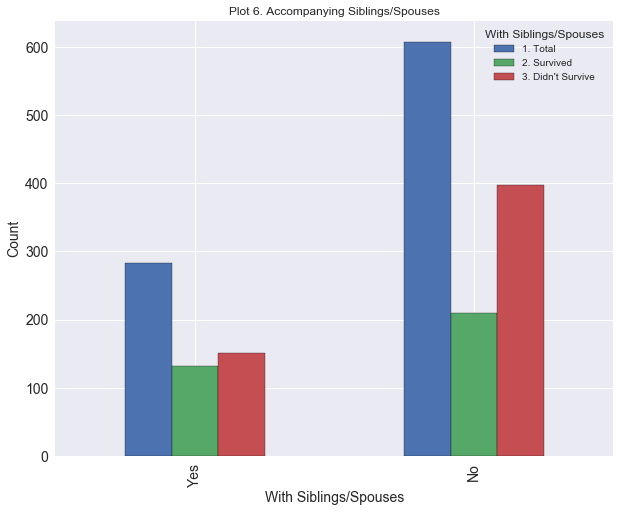

In [14]:
#Survival rate based on accompanying siblings/spouses - Bar Plot
result_4_plot = build_plot(result_4, 'Plot 6. Accompanying Siblings/Spouses', 'With Siblings/Spouses')
plt.show()

In [15]:
#Survival rate based on accompanying parents/children - DataFrame
df_parch = passenger_sib_par('Parch', 1, 'Yes', 'With Parents/Children')
df_no_parch = passenger_sib_par('Parch', 0, 'No', 'With Parents/Children')

frame_5 = [df_parch, df_no_parch]
result_5 = pd.concat(frame_5)
result_5

With Parents/Children,1. Total,2. Survived,3. Didn't Survive,4. % Survived (Percent),5. % Didn't Survive (Percent)
Yes,213,109,104,51.17,48.83
No,678,233,445,34.37,65.63


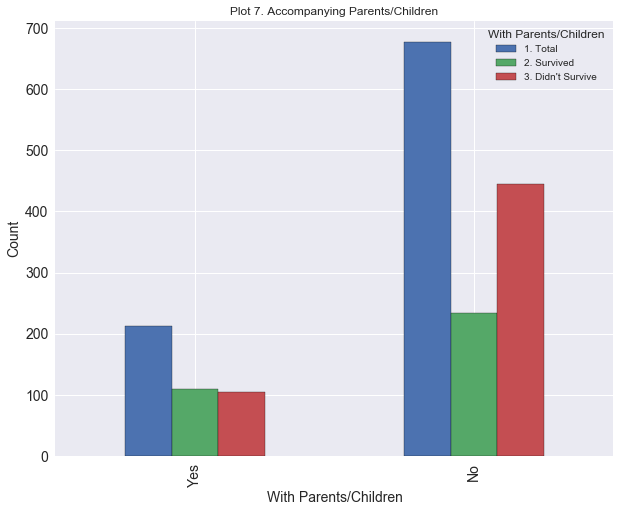

In [16]:
#Survival rate based on accompanying parents/children - Bar Plot
result_5_plot = build_plot(result_5, 'Plot 7. Accompanying Parents/Children', 'With Parents/Children')
plt.show()

In [17]:
#The following function is to determine if the passengers were traveling alone or with a family member

def traveling_with_family(sibsp, parch):
    with_family = sibsp + parch
    if with_family > 0:
        return 'Yes'
    return 'No'

In [18]:
#Adding a new column, to solely represent if the passenger was traveling alone or with family
titanic_df['With Family'] = np.vectorize(traveling_with_family)(titanic_df['SibSp'], titanic_df['Parch'])

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


In [19]:
#An overview on passengers travelling alone or with family - DataFrame
df_with_family = passenger_count('With Family', 'Yes', '', '', 'Yes', 'Traveling With Family')
df_no_family = passenger_count('With Family', 'No', '', '', 'No', 'Traveling With Family')

frame_6 = [df_with_family, df_no_family]
result_6 = pd.concat(frame_6)
result_6

Traveling With Family,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Yes,354,179,175,50.56,49.44
No,537,163,374,30.35,69.65


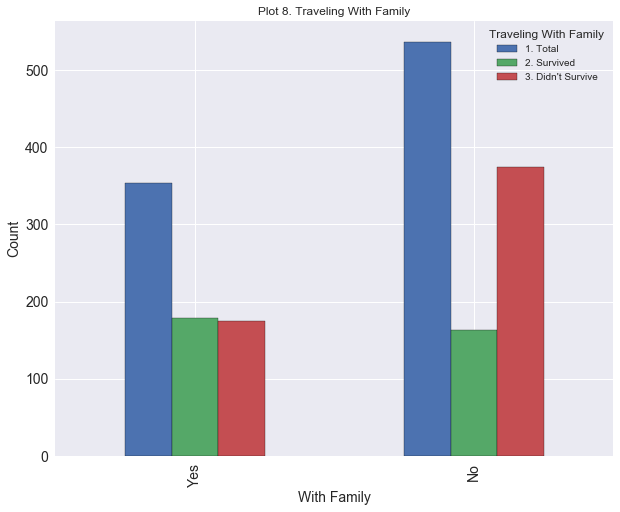

In [20]:
#An overview on passengers travelling alone or with family - Bar Plot
result_6_plot = build_plot(result_6, 'Plot 8. Traveling With Family', 'With Family')
plt.show()

In [21]:
#Survival based on traveling with family and passenger class - DataFrame
df_with_family_1 = passenger_count('With Family', 'Yes', 'Pclass', 1, 'Yes & 1st class', 'With Family & Class')
df_no_family_1 = passenger_count('With Family', 'No', 'Pclass', 1, 'No & 1st class', 'With Family & Class')
df_with_family_2 = passenger_count('With Family', 'Yes', 'Pclass', 2, 'Yes & 2nd class', 'With Family & Class')
df_no_family_2 = passenger_count('With Family', 'No', 'Pclass', 2, 'No & 2nd class', 'With Family & Class')
df_with_family_3 = passenger_count('With Family', 'Yes', 'Pclass', 3, 'Yes & 3rd class', 'With Family & Class')
df_no_family_3 = passenger_count('With Family', 'No', 'Pclass', 3, 'No & 3rd class', 'With Family & Class')

frame_7 = [df_with_family_1, df_no_family_1, df_with_family_2, df_no_family_2, df_with_family_3, df_no_family_3]
result_7 = pd.concat(frame_7)
result_7

With Family & Class,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Yes & 1st class,107,78,29,72.90,27.10
No & 1st class,109,58,51,53.21,46.79
Yes & 2nd class,80,51,29,63.75,36.25
No & 2nd class,104,36,68,34.62,65.38
Yes & 3rd class,167,50,117,29.94,70.06
No & 3rd class,324,69,255,21.30,78.70


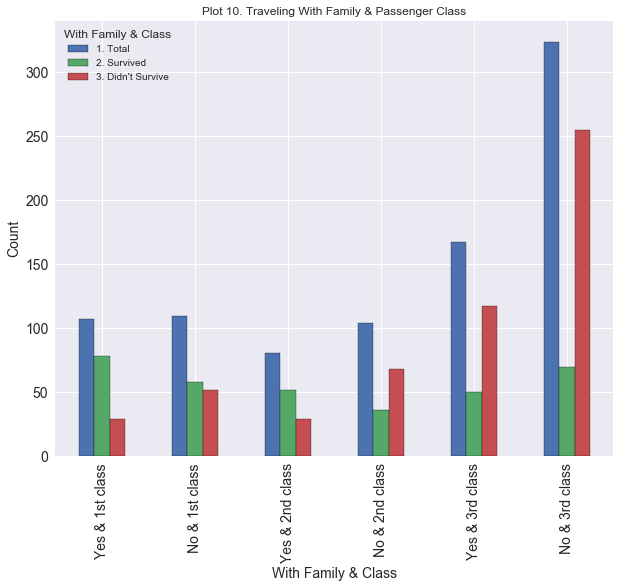

In [22]:
#Survival based on traveling with family and passenger class - Bar Plot
result_7_plot = build_plot(result_7, 'Plot 10. Traveling With Family & Passenger Class', 'With Family & Class')
plt.show()

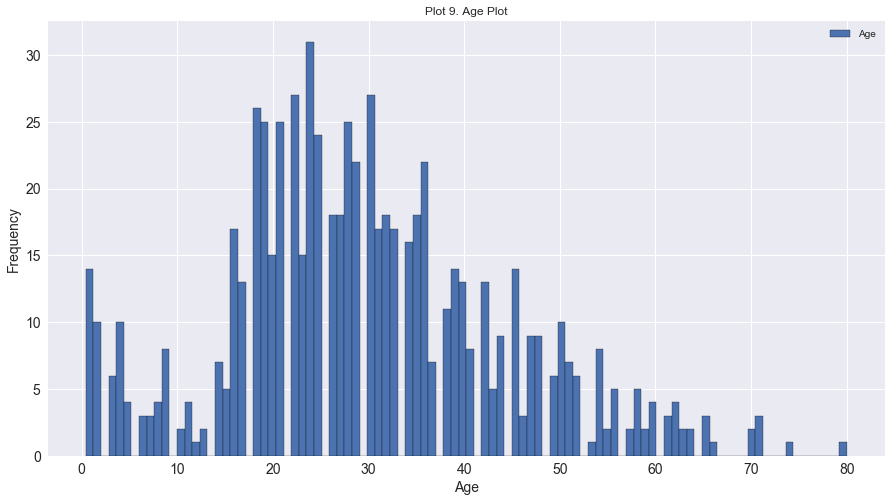

In [23]:
#A general overiew of passenger's age - Histogram
age_plot = titanic_df['Age'].plot(kind = 'hist', bins = 100, ec = 'black', figsize=(15, 8), legend = True, fontsize = 14, title = 'Plot 9. Age Plot')
age_plot.set_xlabel('Age', fontsize = 14)
age_plot.set_ylabel('Frequency', fontsize = 14)
plt.show()

In [24]:
#To determine the age group depending on the passenger's age

def passenger_age_group(age):
    if age >= 0 and age < 10:
        return 'Ages 0 - 9'
    if age >= 10 and age < 20:
        return 'Ages 10 - 19'
    if age >= 20 and age < 30:
        return 'Ages 20 - 29'
    if age >= 30 and age < 40:
        return 'Ages 30 - 39'
    if age >= 40 and age < 50:
        return 'Ages 40 - 49'
    if age >= 50 and age < 60:
        return 'Ages 50 - 59'
    if age >= 60 and age < 70:
        return 'Ages 60 - 69'
    if age >= 70 and age < 80:
        return 'Ages 70 - 79'
    if age >= 80 and age < 90:
        return 'Ages 80 - 89'
    if age >= 90:
        return 'Ages 90 & above'
    return 'N/A'

#To broadly define if the passenger was a child, adult female or male

def person_desc(age, gender):
    if age >= 0 and age < 19:
        return 'Child'
    if age >= 19 and gender == 'female':
        return 'Woman'
    if age >= 19 and gender == 'male':
        return 'Man'
    return 'N/A'

In [25]:
#To create a new column that shows the age group of each passenger
titanic_df = titanic_df.assign(AgeRange = titanic_df['Age'].apply(passenger_age_group))
titanic_df['PersonDesc'] = titanic_df.apply(lambda x: person_desc(x['Age'], x['Sex']), axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With Family,AgeRange,PersonDesc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes,Ages 20 - 29,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Ages 30 - 39,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No,Ages 20 - 29,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Ages 30 - 39,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Ages 30 - 39,Man


In [26]:
#Passenger survival based on their age ranges - DataFrame
df_0_to_9 = passenger_count('AgeRange', 'Ages 0 - 9', '', '', 'Ages 0 - 9', 'Age Range')
df_10_to_19 = passenger_count('AgeRange', 'Ages 10 - 19', '', '', 'Ages 10 - 19', 'Age Range')
df_20_to_29 = passenger_count('AgeRange', 'Ages 20 - 29', '', '', 'Ages 20 - 29', 'Age Range')
df_30_to_39 = passenger_count('AgeRange', 'Ages 30 - 39', '', '', 'Ages 30 - 39', 'Age Range')
df_40_to_49 = passenger_count('AgeRange', 'Ages 40 - 49', '', '', 'Ages 40 - 49', 'Age Range')
df_50_to_59 = passenger_count('AgeRange', 'Ages 50 - 59', '', '', 'Ages 50 - 59', 'Age Range')
df_60_to_69 = passenger_count('AgeRange', 'Ages 60 - 69', '', '', 'Ages 60 - 69', 'Age Range')
df_70_to_79 = passenger_count('AgeRange', 'Ages 70 - 79', '', '', 'Ages 70 - 79', 'Age Range')
df_80_to_89 = passenger_count('AgeRange', 'Ages 80 - 89', '', '', 'Ages 80 - 89', 'Age Range')
df_90 = passenger_count('AgeRange', 'Ages 90 & above', '', '', 'Ages 90 & above', 'Age Range')

frame_8 = [df_0_to_9, df_10_to_19, df_20_to_29, df_30_to_39, df_40_to_49, df_50_to_59, df_60_to_69, df_70_to_79, df_80_to_89, df_90]
result_8 = pd.concat(frame_8)
result_8

Age Range,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Ages 0 - 9,62,38,24,61.29,38.71
Ages 10 - 19,102,41,61,40.20,59.80
Ages 20 - 29,220,77,143,35.00,65.00
Ages 30 - 39,167,73,94,43.71,56.29
Ages 40 - 49,89,34,55,38.20,61.80
Ages 50 - 59,48,20,28,41.67,58.33
Ages 60 - 69,19,6,13,31.58,68.42
Ages 70 - 79,6,0,6,0.00,100.00
Ages 80 - 89,1,1,0,100.00,0.00
Ages 90 & above,0,0,0,0.00,0.00


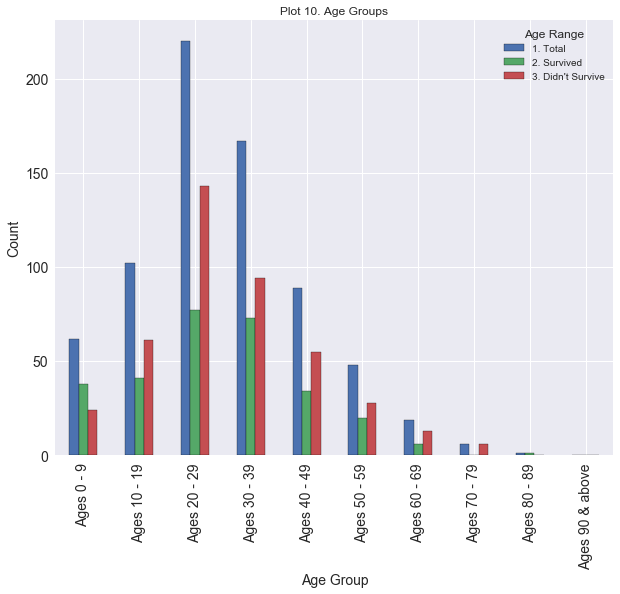

In [27]:
#Passenger survival based on their age ranges - Bar Plot
result_8_plot = build_plot(result_8, 'Plot 10. Age Groups', 'Age Group')
plt.show()

We can further analyze the above result in terms of three broader categories:
- children (ages 0 - 17)
- adult females  (ages 18 and more)
- adult males (ages 18 and more)

In [28]:
#Survival based on children, adult females and adult males - DataFrame
df_child = passenger_count('PersonDesc', 'Child', '', '', 'Children', 'Group')
df_women = passenger_count('PersonDesc', 'Woman', '', '', 'Women', 'Group')
df_men = passenger_count('PersonDesc', 'Man', '', '', 'Men', 'Group')

frame_9 = [df_child, df_women, df_men]
result_9 = pd.concat(frame_9)
result_9

Group,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Children,139,70,69,50.36,49.64
Women,193,151,42,78.24,21.76
Men,382,69,313,18.06,81.94


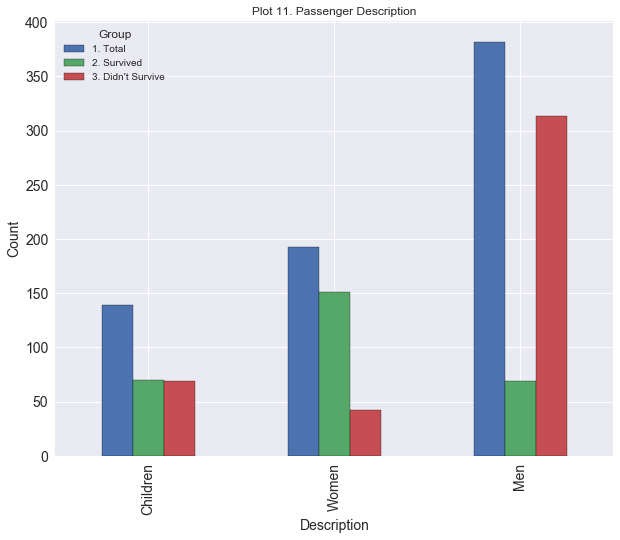

In [29]:
#Survival based on children, adult females and adult males - Bar Plot
result_9_plot = build_plot(result_9, 'Plot 11. Passenger Description', 'Description')
plt.show()

In [30]:
#Survival based on children, adult females, adult males and passenger class - DataFrame
df_child_first = passenger_count('PersonDesc', 'Child', 'Pclass', 1, 'Children, 1st Class', 'Group and Class')
df_child_second = passenger_count('PersonDesc', 'Child', 'Pclass', 2, 'Children, 2nd Class', 'Group and Class')
df_child_third = passenger_count('PersonDesc', 'Child', 'Pclass', 3, 'Children, 3rd Class', 'Group and Class')
df_women_first = passenger_count('PersonDesc', 'Woman', 'Pclass', 1, 'Women, 1st Class', 'Group and Class')
df_women_second = passenger_count('PersonDesc', 'Woman', 'Pclass', 2, 'Women, 2nd Class', 'Group and Class')
df_women_third = passenger_count('PersonDesc', 'Woman', 'Pclass', 3, 'Women, 3rd Class', 'Group and Class')
df_men_first = passenger_count('PersonDesc', 'Man', 'Pclass', 1, 'Men, 1st Class', 'Group and Class')
df_men_second = passenger_count('PersonDesc', 'Man', 'Pclass', 2, 'Men, 2nd Class', 'Group and Class')
df_men_third = passenger_count('PersonDesc', 'Man', 'Pclass', 3, 'Men, 3rd Class', 'Group and Class')

frame_10 = [df_child_first, df_child_second, df_child_third, df_women_first, df_women_second, df_women_third,
           df_men_first, df_men_second, df_men_third]
result_10 = pd.concat(frame_10)
result_10

Group and Class,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
"Children, 1st Class",16,14,2,87.50,12.50
"Children, 2nd Class",29,23,6,79.31,20.69
"Children, 3rd Class",94,33,61,35.11,64.89
"Women, 1st Class",74,72,2,97.30,2.70
"Women, 2nd Class",60,54,6,90.00,10.00
"Women, 3rd Class",59,25,34,42.37,57.63
"Men, 1st Class",96,36,60,37.50,62.50
"Men, 2nd Class",84,6,78,7.14,92.86
"Men, 3rd Class",202,27,175,13.37,86.63


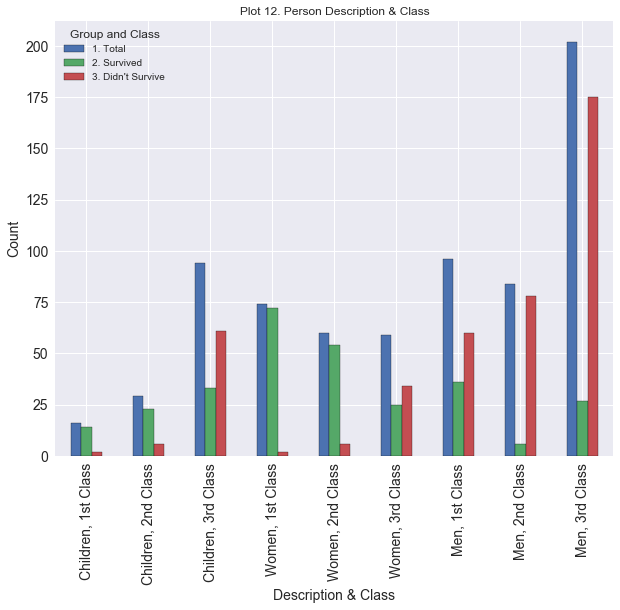

In [31]:
#Survival based on children, adult females, adult males and passenger class - Bar Plot
result_10_plot = build_plot(result_10, 'Plot 12. Person Description & Class', 'Description & Class')
plt.show()

In [32]:
#We are now going to create a new column that will show what decks were the passengers on, by going after the first letter in the cabin

def deck_name(cabin):
    if type(cabin) == str:
        return cabin[0]
    return ''

titanic_df = titanic_df.assign(Deck = titanic_df['Cabin'].apply(deck_name))
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With Family,AgeRange,PersonDesc,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes,Ages 20 - 29,Man,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Ages 30 - 39,Woman,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No,Ages 20 - 29,Woman,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Ages 30 - 39,Woman,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Ages 30 - 39,Man,


In [33]:
#Survival rate based on the decks - DataFrame
df_deck_A = passenger_count('Deck', 'A', '', '', 'A', 'Deck')
df_deck_B = passenger_count('Deck', 'B', '', '', 'B', 'Deck')
df_deck_C = passenger_count('Deck', 'C', '', '', 'C', 'Deck')
df_deck_D = passenger_count('Deck', 'D', '', '', 'D', 'Deck')
df_deck_E = passenger_count('Deck', 'E', '', '', 'E', 'Deck')
df_deck_F = passenger_count('Deck', 'F', '', '', 'F', 'Deck')
df_deck_G = passenger_count('Deck', 'G', '', '', 'G', 'Deck')
df_deck_T = passenger_count('Deck', 'T', '', '', 'T', 'Deck')

frame_11 = [df_deck_A, df_deck_B, df_deck_C, df_deck_D, df_deck_E, df_deck_F, df_deck_G, df_deck_T]
result_11 = pd.concat(frame_11)
result_11

Deck,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
A,15,7,8,46.67,53.33
B,47,35,12,74.47,25.53
C,59,35,24,59.32,40.68
D,33,25,8,75.76,24.24
E,32,24,8,75.00,25.00
F,13,8,5,61.54,38.46
G,4,2,2,50.00,50.00
T,1,0,1,0.00,100.00


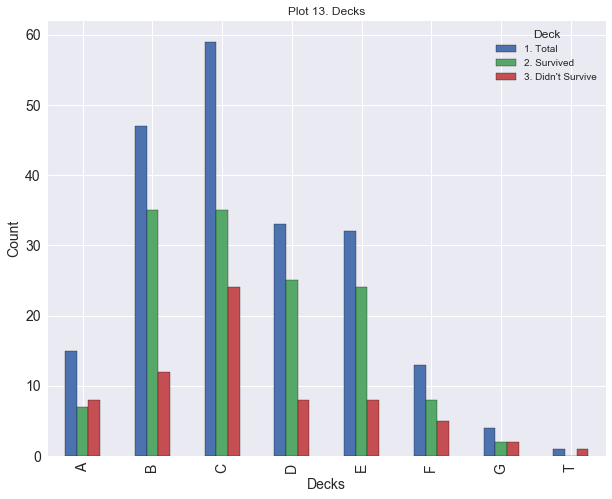

In [34]:
#Survival rate based on the decks - Bar Plot
result_11_plot = build_plot(result_11, 'Plot 13. Decks', 'Decks')
plt.show()

In [35]:
#Survival rate based on the deck and passenger class - DataFrame
df_A_first = passenger_count('Deck', 'A', 'Pclass', 1, 'Deck A & 1st Class', 'Deck & Class')
df_A_second = passenger_count('Deck', 'A', 'Pclass', 2, 'Deck A & 2nd Class', 'Deck & Class')
df_A_third = passenger_count('Deck', 'A', 'Pclass', 3, 'Deck A & 3rd Class', 'Deck & Class')
df_B_first = passenger_count('Deck', 'B', 'Pclass', 1, 'Deck B & 1st Class', 'Deck & Class')
df_B_second = passenger_count('Deck', 'B', 'Pclass', 2, 'Deck B & 2nd Class', 'Deck & Class')
df_B_third = passenger_count('Deck', 'B', 'Pclass', 3, 'Deck B & 3rd Class', 'Deck & Class')
df_C_first = passenger_count('Deck', 'C', 'Pclass', 1, 'Deck C & 1st Class', 'Deck & Class')
df_C_second = passenger_count('Deck', 'C', 'Pclass', 2, 'Deck C & 2nd Class', 'Deck & Class')
df_C_third = passenger_count('Deck', 'C', 'Pclass', 3, 'Deck C & 3rd Class', 'Deck & Class')
df_D_first = passenger_count('Deck', 'D', 'Pclass', 1, 'Deck D & 1st Class', 'Deck & Class')
df_D_second = passenger_count('Deck', 'D', 'Pclass', 2, 'Deck D & 2nd Class', 'Deck & Class')
df_D_third = passenger_count('Deck', 'D', 'Pclass', 3, 'Deck D & 3rd Class', 'Deck & Class')
df_E_first = passenger_count('Deck', 'E', 'Pclass', 1, 'Deck E & 1st Class', 'Deck & Class')
df_E_second = passenger_count('Deck', 'E', 'Pclass', 2, 'Deck E & 2nd Class', 'Deck & Class')
df_E_third = passenger_count('Deck', 'E', 'Pclass', 3, 'Deck E & 3rd Class', 'Deck & Class')
df_F_first = passenger_count('Deck', 'F', 'Pclass', 1, 'Deck F & 1st Class', 'Deck & Class')
df_F_second = passenger_count('Deck', 'F', 'Pclass', 2, 'Deck F & 2nd Class', 'Deck & Class')
df_F_third = passenger_count('Deck', 'F', 'Pclass', 3, 'Deck F & 3rd Class', 'Deck & Class')
df_G_first = passenger_count('Deck', 'G', 'Pclass', 1, 'Deck G & 1st Class', 'Deck & Class')
df_G_second = passenger_count('Deck', 'G', 'Pclass', 2, 'Deck G & 2nd Class', 'Deck & Class')
df_G_third = passenger_count('Deck', 'G', 'Pclass', 3, 'Deck G & 3rd Class', 'Deck & Class')
df_T_first = passenger_count('Deck', 'T', 'Pclass', 1, 'Deck T & 1st Class', 'Deck & Class')
df_T_second = passenger_count('Deck', 'T', 'Pclass', 2, 'Deck T & 2nd Class', 'Deck & Class')
df_T_third = passenger_count('Deck', 'T', 'Pclass', 3, 'Deck T & 3rd Class', 'Deck & Class')

frame_12 = [df_A_first, df_A_second, df_A_third, df_B_first, df_B_second, df_B_third, df_C_first, df_C_second, df_C_third,
            df_D_first, df_D_second, df_D_third, df_E_first, df_E_second, df_E_third, df_F_first, df_F_second, df_F_third,
            df_G_first, df_G_second, df_G_third, df_T_first, df_T_second, df_T_third]
result_12 = pd.concat(frame_12)
result_12 = result_12[result_12['1. Total'] != 0]
result_12

Deck & Class,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
Deck A & 1st Class,15,7,8,46.67,53.33
Deck B & 1st Class,47,35,12,74.47,25.53
Deck C & 1st Class,59,35,24,59.32,40.68
Deck D & 1st Class,29,22,7,75.86,24.14
Deck D & 2nd Class,4,3,1,75.00,25.00
Deck E & 1st Class,25,18,7,72.00,28.00
Deck E & 2nd Class,4,3,1,75.00,25.00
Deck E & 3rd Class,3,3,0,100.00,0.00
Deck F & 2nd Class,8,7,1,87.50,12.50
Deck F & 3rd Class,5,1,4,20.00,80.00


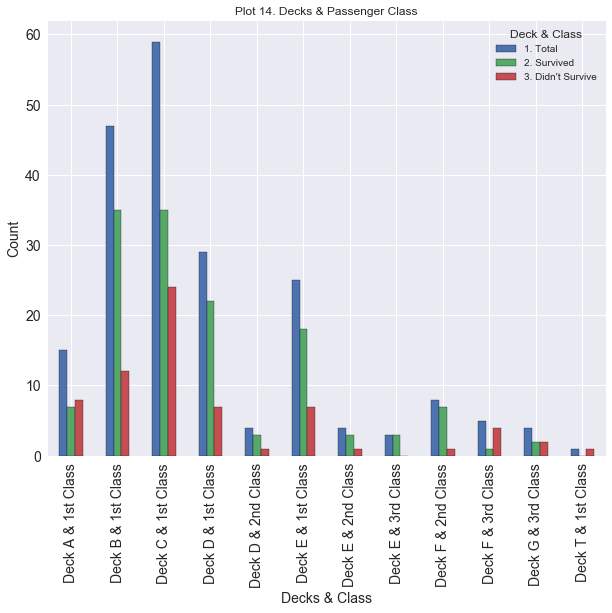

In [36]:
#Survival rate based on the deck and passenger class - Bar Plot
result_12_plot = build_plot(result_12, 'Plot 14. Decks & Passenger Class', 'Decks & Class')
plt.show()

In [37]:
#Survival rate based on the ports embarked - DataFrame
df_embark_C = passenger_count('Embarked', 'C', '', '', 'C', 'Port')
df_embark_Q = passenger_count('Embarked', 'Q', '', '', 'Q', 'Port')
df_embark_S = passenger_count('Embarked', 'S', '', '', 'S', 'Port')

frame_13 = [df_embark_C, df_embark_Q, df_embark_S]
result_13 = pd.concat(frame_13)
result_13

Port,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
C,168,93,75,55.36,44.64
Q,77,30,47,38.96,61.04
S,644,217,427,33.70,66.30


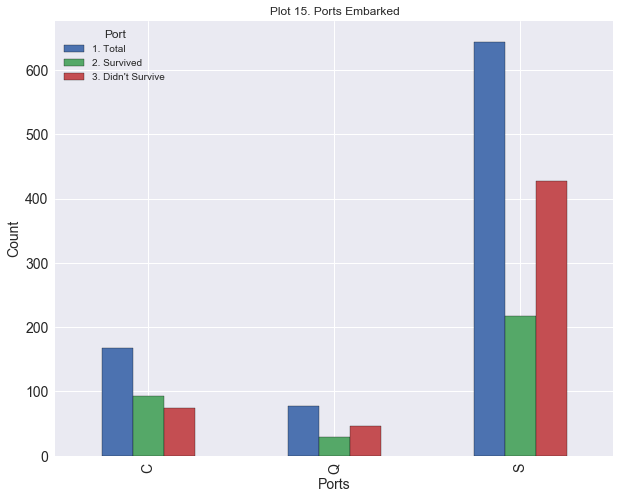

In [38]:
#Survival rate based on the ports embarked - Bar Plot
result_13_plot = build_plot(result_13, 'Plot 15. Ports Embarked', 'Ports')
plt.show()

In [39]:
#Survival rate based on the ports embarked and passenger class - DataFrame
df_C_first = passenger_count('Embarked', 'C', 'Pclass', 1, 'C & 1st Class', 'Port & Class')
df_C_second = passenger_count('Embarked', 'C', 'Pclass', 2, 'C & 2nd Class', 'Port & Class')
df_C_third = passenger_count('Embarked', 'C', 'Pclass', 3, 'C & 3rd Class', 'Port & Class')
df_Q_first = passenger_count('Embarked', 'Q', 'Pclass', 1, 'Q & 1st Class', 'Port & Class')
df_Q_second = passenger_count('Embarked', 'Q', 'Pclass', 2, 'Q & 2nd Class', 'Port & Class')
df_Q_third = passenger_count('Embarked', 'Q', 'Pclass', 3, 'Q & 3rd Class', 'Port & Class')
df_S_first = passenger_count('Embarked', 'S', 'Pclass', 1, 'S & 1st Class', 'Port & Class')
df_S_second = passenger_count('Embarked', 'S', 'Pclass', 2, 'S & 2nd Class', 'Port & Class')
df_S_third = passenger_count('Embarked', 'S', 'Pclass', 3, 'S & 3rd Class', 'Port & Class')

frame_14 = [df_C_first, df_C_second, df_C_third, df_Q_first, df_Q_second, df_Q_third, df_S_first, df_S_second, df_S_third]
result_14 = pd.concat(frame_14)
result_14

Port & Class,1. Total,2. Survived,3. Didn't Survive,4. % Survived,5. % Didn't Survive
C & 1st Class,85,59,26,69.41,30.59
C & 2nd Class,17,9,8,52.94,47.06
C & 3rd Class,66,25,41,37.88,62.12
Q & 1st Class,2,1,1,50.00,50.00
Q & 2nd Class,3,2,1,66.67,33.33
Q & 3rd Class,72,27,45,37.50,62.50
S & 1st Class,127,74,53,58.27,41.73
S & 2nd Class,164,76,88,46.34,53.66
S & 3rd Class,353,67,286,18.98,81.02


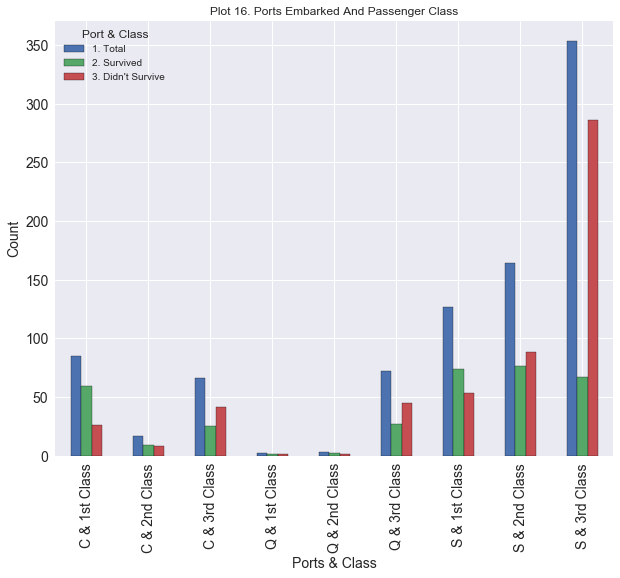

In [40]:
#Survival rate based on the ports embarked and passenger class - Bar Plot
result_14_plot = build_plot(result_14, 'Plot 16. Ports Embarked And Passenger Class', 'Ports & Class')
plt.show()